In [7]:
#Import the required packages with their customary aliases
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
pd.set_option('display.max_columns', 104)
sns.set(color_codes=True)
#Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time
%matplotlib inline

In [2]:
energy_consumption_combine_df = pd.read_csv('energy_consumption_combine.csv')

In [3]:
energy_consumption_combine_df.head()

,Unnamed: 0,year,month,monthly_usage,zip_code,geometry,latitude,longitude,geo,cust_type
0,165,2015.0,8,8257562.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial
1,167,2015.0,8,6517747.0,37204.0,"(36.109305, -86.776748)",36.109305,-86.7767,POINT (-86.77670000000001 36.109305),commercial
2,168,2015.0,8,398400.0,37242.0,"(36.165017, -86.782171)",36.165017,-86.7821,POINT (-86.7821 36.165017),commercial
3,169,2015.0,8,31900.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial
4,171,2015.0,8,2148.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial


In [4]:
del energy_consumption_combine_df['Unnamed: 0']

In [5]:
energy_consumption_combine_df.head()

,year,month,monthly_usage,zip_code,geometry,latitude,longitude,geo,cust_type
0,2015.0,8,8257562.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial
1,2015.0,8,6517747.0,37204.0,"(36.109305, -86.776748)",36.109305,-86.7767,POINT (-86.77670000000001 36.109305),commercial
2,2015.0,8,398400.0,37242.0,"(36.165017, -86.782171)",36.165017,-86.7821,POINT (-86.7821 36.165017),commercial
3,2015.0,8,31900.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial
4,2015.0,8,2148.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial


##### To pull latitude & longitude from the mapped_loc column to two new columns, we first need a function to extract lat and lng

In [8]:
(36.109305, -86.776748)
lat_lng_pattern = re.compile(r'\((.*),\s*(.*)\)', flags=re.MULTILINE)
def extract_lat_lng(address):
    try:
        lat_lng_match = lat_lng_pattern.search(address)
        lat = float(lat_lng_match.group(1))
        lng = float(lat_lng_match.group(2))
        return (lat, lng)
    except:
        return (np.NaN, np.NaN)  #it's important that our list be exactly as long as our df``

###### Iterating through the mapped_loc column, we apply our function to extract lat/lng pairs and store them in a list of tuples. Then we can use a list comprehension to iterate through the tuple and create out two new columns.

In [9]:
lat_lngs = [extract_lat_lng(location) for location in energy_consumption_combine_df.loc[:, 'geometry']]
energy_consumption_combine_df['lat'] = [lat for lat, lng in lat_lngs]
energy_consumption_combine_df['lng'] = [lng for lat, lng in lat_lngs]

In [10]:
energy_consumption_combine_df.head()

,year,month,monthly_usage,zip_code,geometry,latitude,longitude,geo,cust_type,lat,lng
0,2015.0,8,8257562.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial,NaN,NaN
1,2015.0,8,6517747.0,37204.0,"(36.109305, -86.776748)",36.109305,-86.7767,POINT (-86.77670000000001 36.109305),commercial,36.109305,-86.776748
2,2015.0,8,398400.0,37242.0,"(36.165017, -86.782171)",36.165017,-86.7821,POINT (-86.7821 36.165017),commercial,36.165017,-86.782171
3,2015.0,8,31900.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial,NaN,NaN
4,2015.0,8,2148.0,NaN,NaN,NaN,NaN,POINT (nan nan),commercial,NaN,NaN


###### Delete columns

In [12]:
del energy_consumption_combine_df['latitude']


In [13]:
del energy_consumption_combine_df['longitude']

In [15]:
del energy_consumption_combine_df['geometry']

In [16]:
energy_consumption_combine_df.head()

,year,month,monthly_usage,zip_code,geo,cust_type,lat,lng
0,2015.0,8,8257562.0,NaN,POINT (nan nan),commercial,NaN,NaN
1,2015.0,8,6517747.0,37204.0,POINT (-86.77670000000001 36.109305),commercial,36.109305,-86.776748
2,2015.0,8,398400.0,37242.0,POINT (-86.7821 36.165017),commercial,36.165017,-86.782171
3,2015.0,8,31900.0,NaN,POINT (nan nan),commercial,NaN,NaN
4,2015.0,8,2148.0,NaN,POINT (nan nan),commercial,NaN,NaN


###### Renaming the columns

In [29]:
energy_consumption_combine_df2 = energy_consumption_combine_df.rename(columns={'year': 'year', 'month': 'month', 'monthly_usage': 'monthly_usage', 'zip_code': 'zip_code', 'cust_type':'customer_type', 'lat': 'lat', 'lng': 'lng', 'geo': 'geometry'})
energy_consumption_combine_df2.head()

,year,month,monthly_usage,zip_code,geometry,customer_type,lat,lng
0,2015.0,8,8257562.0,NaN,POINT (nan nan),commercial,NaN,NaN
1,2015.0,8,6517747.0,37204.0,POINT (-86.77670000000001 36.109305),commercial,36.109305,-86.776748
2,2015.0,8,398400.0,37242.0,POINT (-86.7821 36.165017),commercial,36.165017,-86.782171
3,2015.0,8,31900.0,NaN,POINT (nan nan),commercial,NaN,NaN
4,2015.0,8,2148.0,NaN,POINT (nan nan),commercial,NaN,NaN


###### Rearrange columns

In [31]:
energy_consumption_combine_df2 = energy_consumption_combine_df2[['year', 'month', 'zip_code', 'customer_type', 'monthly_usage', 'lat', 'lng', 'geometry']]


In [32]:
energy_consumption_combine_df2.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
0,2015.0,8,NaN,commercial,8257562.0,NaN,NaN,POINT (nan nan)
1,2015.0,8,37204.0,commercial,6517747.0,36.109305,-86.776748,POINT (-86.77670000000001 36.109305)
2,2015.0,8,37242.0,commercial,398400.0,36.165017,-86.782171,POINT (-86.7821 36.165017)
3,2015.0,8,NaN,commercial,31900.0,NaN,NaN,POINT (nan nan)
4,2015.0,8,NaN,commercial,2148.0,NaN,NaN,POINT (nan nan)


In [33]:
del energy_consumption_combine_df2['geometry']

In [34]:
energy_consumption_combine_df2.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng
0,2015.0,8,NaN,commercial,8257562.0,NaN,NaN
1,2015.0,8,37204.0,commercial,6517747.0,36.109305,-86.776748
2,2015.0,8,37242.0,commercial,398400.0,36.165017,-86.782171
3,2015.0,8,NaN,commercial,31900.0,NaN,NaN
4,2015.0,8,NaN,commercial,2148.0,NaN,NaN


###### Create a geometry column using POINT

In [35]:
energy_consumption_combine_df2['geometry'] = energy_consumption_combine_df2.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)
energy_consumption_combine_df2.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
0,2015.0,8,NaN,commercial,8257562.0,NaN,NaN,POINT (nan nan)
1,2015.0,8,37204.0,commercial,6517747.0,36.109305,-86.776748,POINT (-86.776748 36.109305)
2,2015.0,8,37242.0,commercial,398400.0,36.165017,-86.782171,POINT (-86.78217100000001 36.165017)
3,2015.0,8,NaN,commercial,31900.0,NaN,NaN,POINT (nan nan)
4,2015.0,8,NaN,commercial,2148.0,NaN,NaN,POINT (nan nan)


##### MONTHLY USAGE HIGHEST DURING THE MONTH JULY AND LOWEST IN NOVEMBER

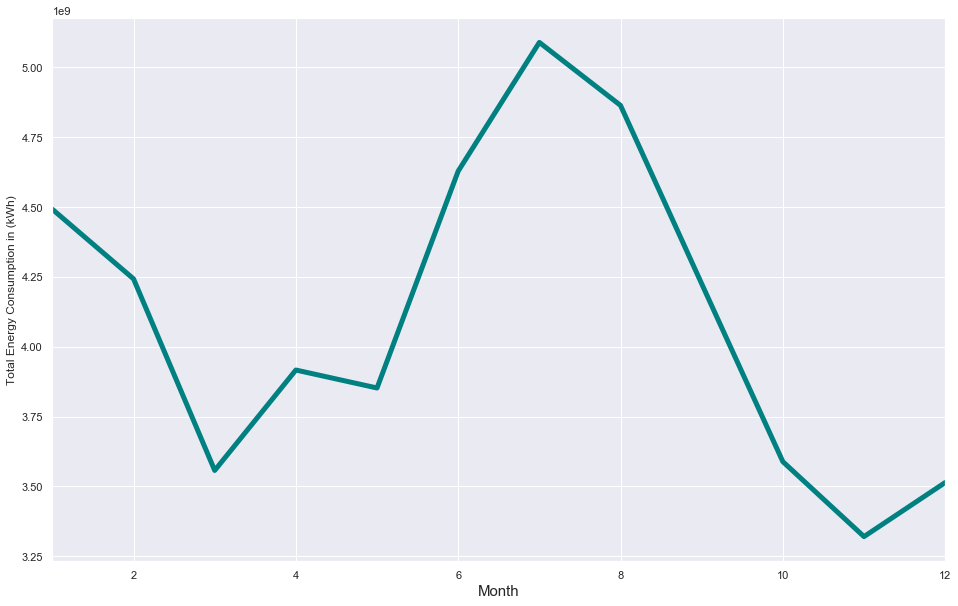

In [59]:

plt.rcParams['figure.figsize'] = (16,10)
temp_df = energy_consumption_combine_df2.groupby('month').monthly_usage.sum()
temp_df.plot(linewidth = 5, color = 'teal')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Total Energy Consumption in (kWh)')
plt.show()

##### YEARLY ENERGY USAGE PER CUSTOMER TYPE

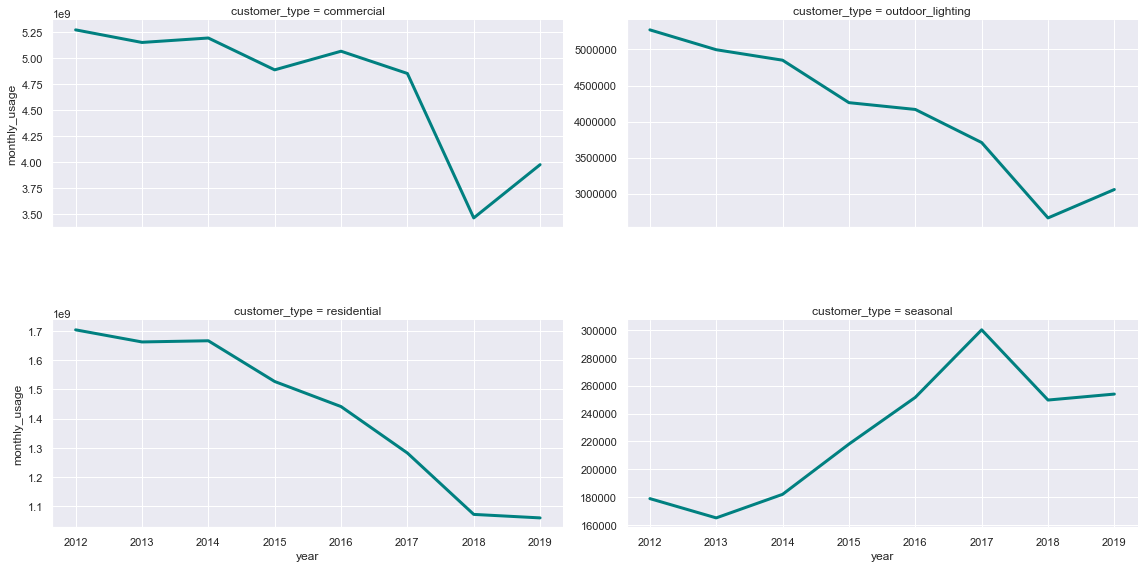

In [37]:

temp_df = energy_consumption_combine_df2.groupby(['year', 'customer_type']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col="customer_type", col_wrap=2, height=4, aspect=2,  sharey=False)
ax.map(plt.plot, 'year', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.show()

##### MONTHLY ENERGY USAGE PER CUSTOMER TYPE

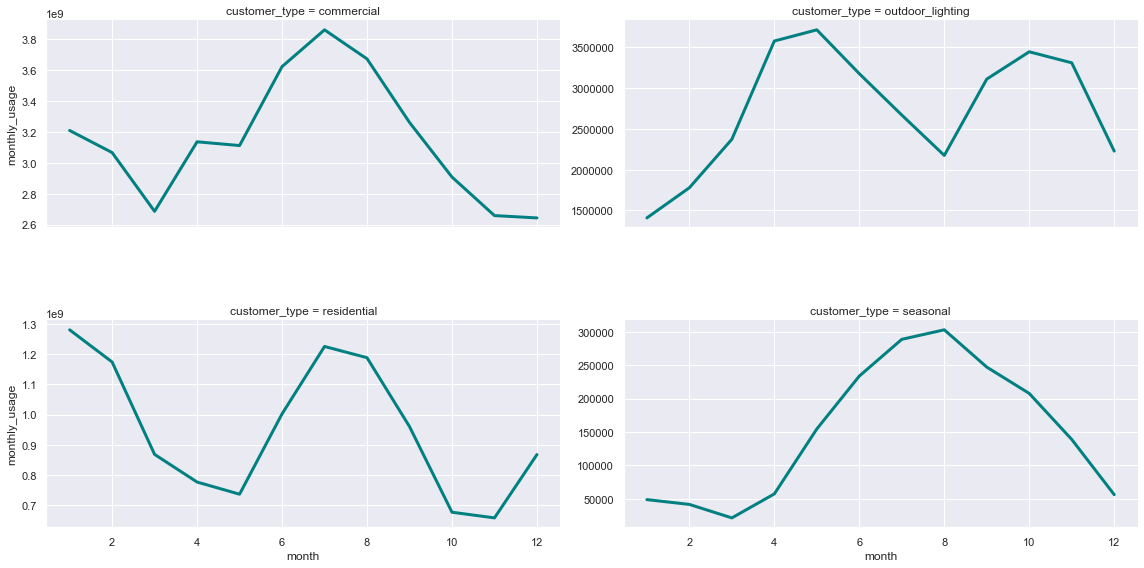

In [39]:

temp_df = energy_consumption_combine_df2.groupby(['month', 'customer_type']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col="customer_type", col_wrap=2, height=4, aspect=2,  sharey=False)
ax.map(plt.plot, 'month', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.show()

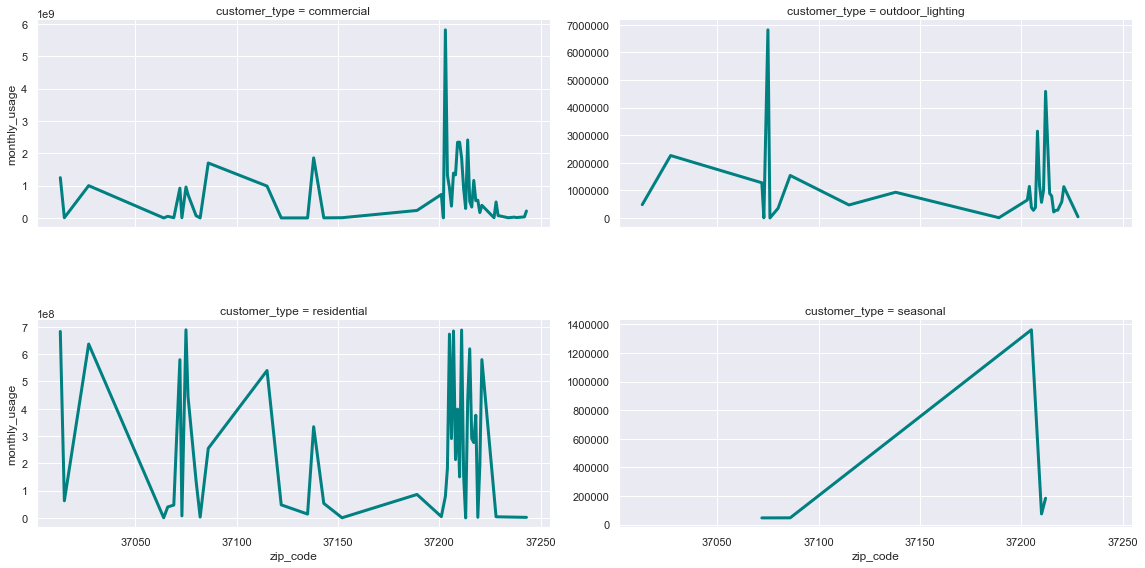

In [58]:
#bold('**Monthly ENERGY USAGE PER CUSTOMER TYPE PER ZIP CODE**')
temp_df = energy_consumption_combine_df2.groupby(['zip_code', 'customer_type']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col="customer_type", col_wrap=2, height=4, aspect=2,  sharey=False)
ax.map(plt.plot, 'zip_code', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.show()

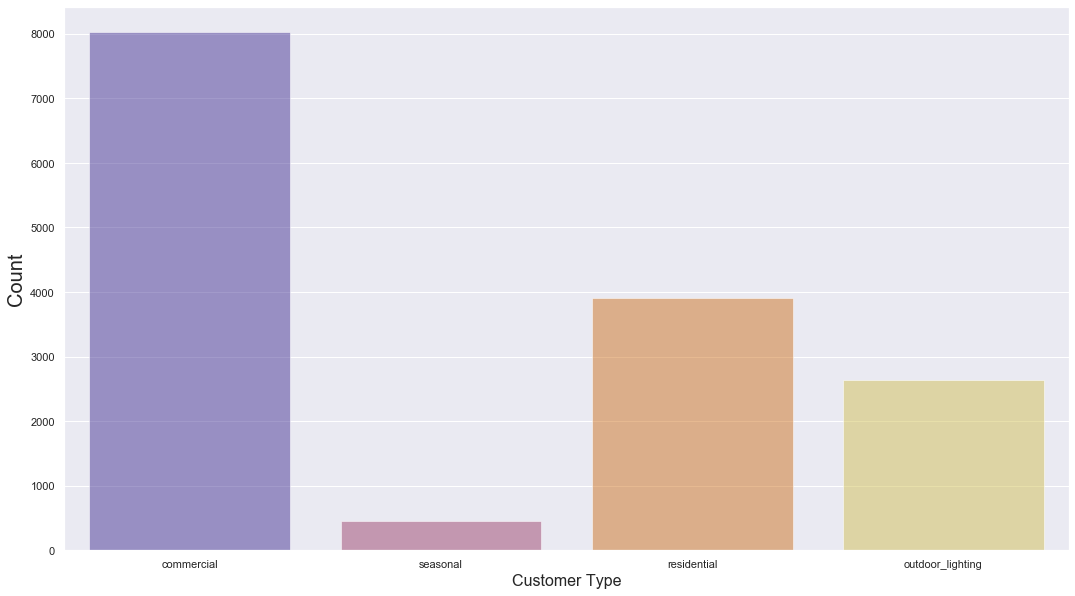

In [40]:
# THE MOST FREQUENT CUSTOMER TYPE
plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.countplot(data = energy_consumption_combine_df2, x ='customer_type', palette = 'CMRmap', alpha = 0.5)
ax.set_ylabel('Count', fontsize = 20)
ax.set_xlabel('Customer Type', fontsize = 16)
plt.show()

#bold('**MONTHLY USAGE PER YEAR PER CUSTOMER TYPE**')
temp_df = outdoorlight_df.groupby(['zip_code', 'month']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col="month", col_wrap=2, height=4, aspect=2,  sharey=False)
ax.map(plt.plot, 'zip_code', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

###### Commercial Dataframe

In [41]:
commercial_combine_df = energy_consumption_combine_df2.loc[energy_consumption_combine_df2.customer_type == 'commercial']
commercial_combine_df.head()


,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
0,2015.0,8,NaN,commercial,8257562.0,NaN,NaN,POINT (nan nan)
1,2015.0,8,37204.0,commercial,6517747.0,36.109305,-86.776748,POINT (-86.776748 36.109305)
2,2015.0,8,37242.0,commercial,398400.0,36.165017,-86.782171,POINT (-86.78217100000001 36.165017)
3,2015.0,8,NaN,commercial,31900.0,NaN,NaN,POINT (nan nan)
4,2015.0,8,NaN,commercial,2148.0,NaN,NaN,POINT (nan nan)


In [42]:
commercial_combine_df.describe()

,year,month,zip_code,monthly_usage,lat,lng
count,7849.000000,8021.000000,7699.000000,7.849000e+03,7316.000000,7316.000000
mean,2015.332526,6.354569,37165.258735,4.821135e+06,36.174081,-86.765781
std,2.246475,3.378190,69.742536,9.184393e+06,0.106411,0.120363
min,2012.000000,1.000000,37013.000000,0.000000e+00,35.889628,-87.117051
25%,2013.000000,4.000000,37086.000000,1.622990e+05,36.109305,-86.812249
50%,2015.000000,6.000000,37205.000000,1.081401e+06,36.166899,-86.776955
75%,2017.000000,9.000000,37216.000000,5.482153e+06,36.224945,-86.704171
max,2019.000000,12.000000,37243.000000,8.508422e+07,36.427640,-86.459057


##### TOTAL MONTHLY ENERGY USAGE PER YEAR FOR COMMERCIAL USE

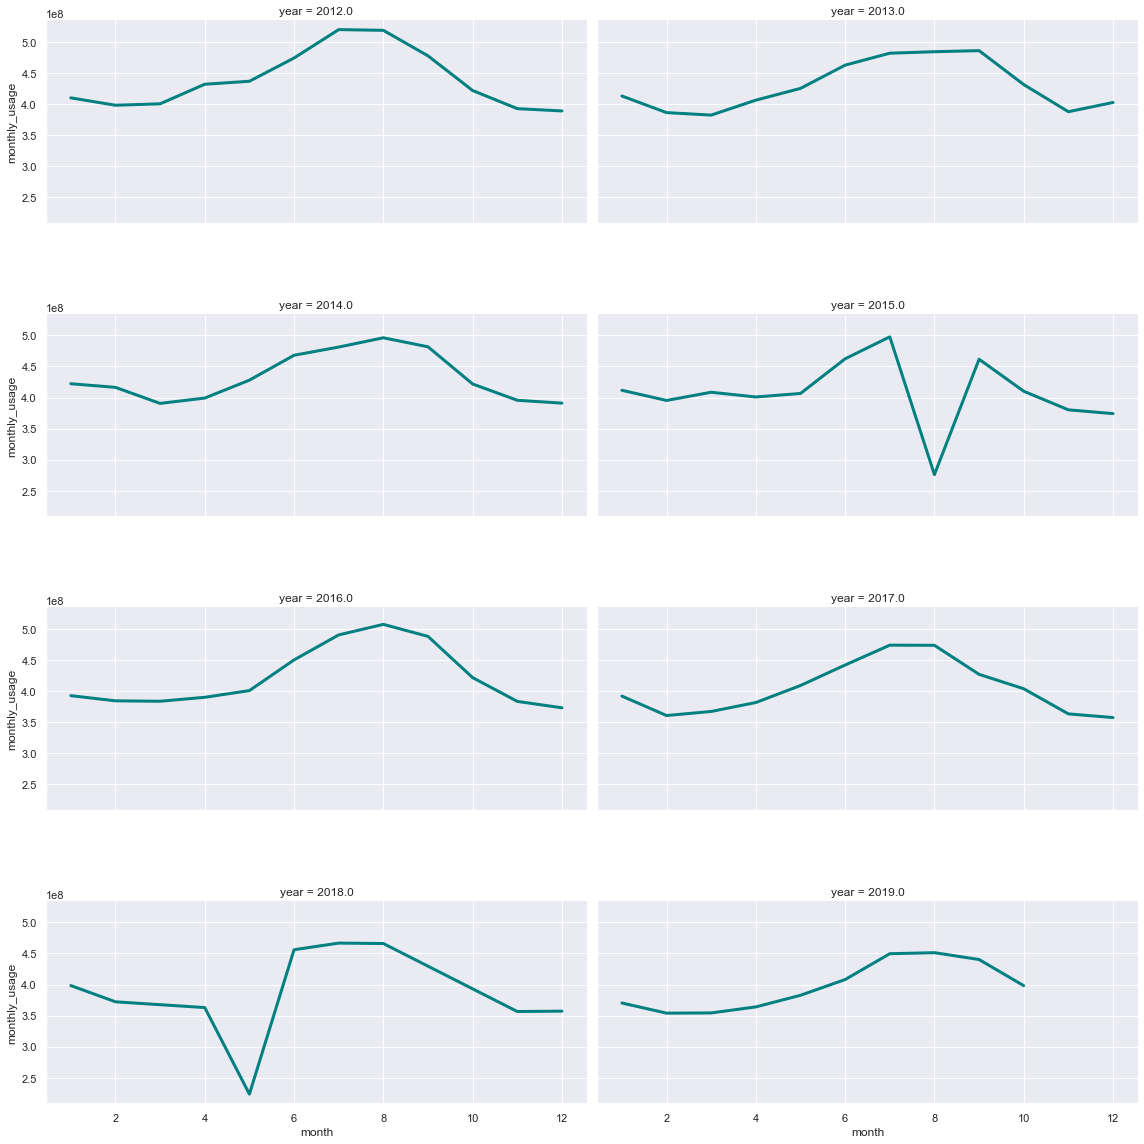

In [55]:
temp_df = commercial_combine_df.groupby(['month', 'year']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col='year', col_wrap=2, height=4, aspect=2,  sharey=True)
ax.map(plt.plot, 'month', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.show()

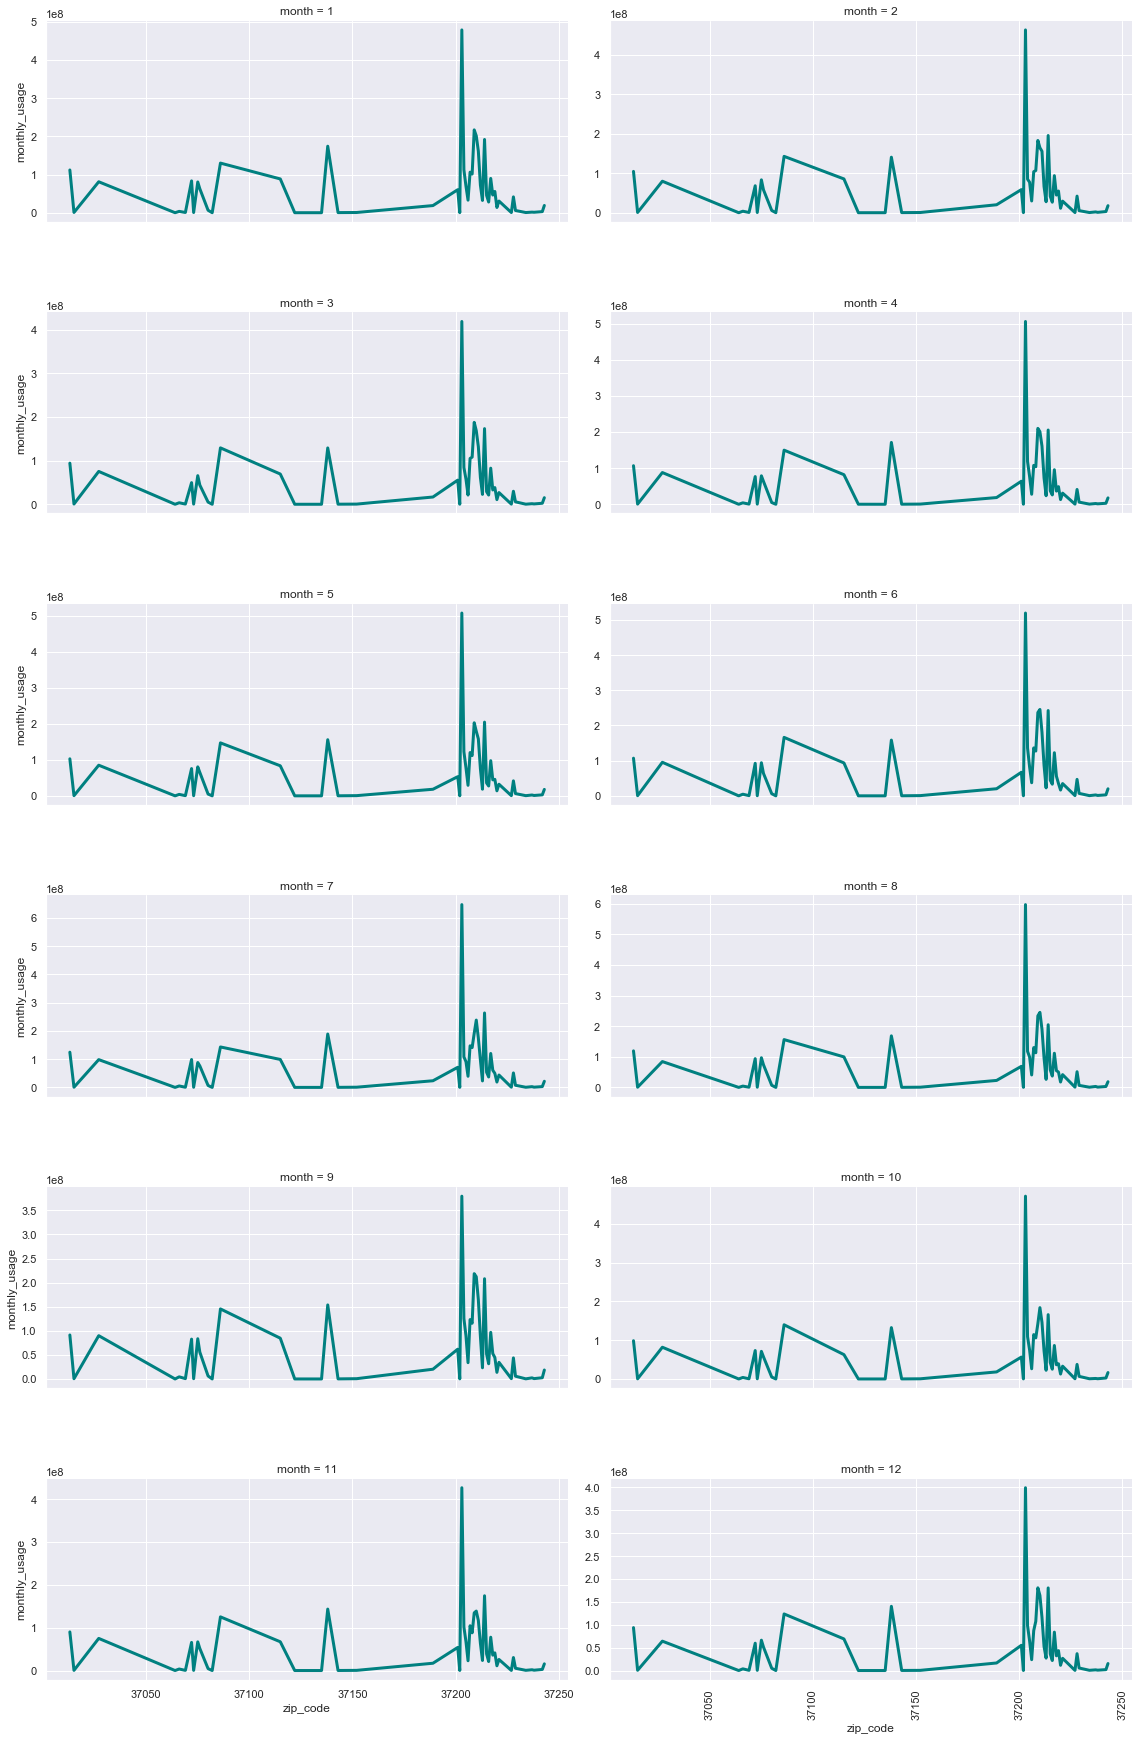

In [54]:
#bold('**MONTHLY USAGE PER YEAR PER CUSTOMER TYPE**')
temp_df = commercial_combine_df.groupby(['zip_code', 'month']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col="month", col_wrap=2, height=4, aspect=2,  sharey=False)
ax.map(plt.plot, 'zip_code', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.xticks(rotation=90)
plt.show()

###### Residential Dataframe

In [43]:
residential_combine_df = energy_consumption_combine_df2.loc[energy_consumption_combine_df2.customer_type == 'residential']
residential_combine_df.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
8470,2016.0,1,37206.0,residential,4032207.0,36.180950,-86.739624,POINT (-86.73962400000001 36.18095)
8471,2016.0,1,37015.0,residential,833727.0,36.290030,-87.070106,POINT (-87.070106 36.29003)
8472,2016.0,1,37205.0,residential,7313534.0,36.112469,-86.867263,POINT (-86.86726299999999 36.112469)
8473,2016.0,1,37243.0,residential,16520.0,36.166899,-86.776720,POINT (-86.77672 36.166899)
8474,2016.0,1,37204.0,residential,2167596.0,36.109305,-86.776748,POINT (-86.776748 36.109305)


In [44]:
residential_combine_df.describe()

,year,month,zip_code,monthly_usage,lat,lng
count,3822.000000,3906.000000,3769.000000,3.822000e+03,3601.000000,3601.000000
mean,2015.340659,6.354839,37154.525338,2.986484e+06,36.166127,-86.774595
std,2.244798,3.378557,69.741390,3.016808e+06,0.117920,0.136564
min,2012.000000,1.000000,37013.000000,3.230000e+02,35.889628,-87.117051
25%,2013.000000,4.000000,37080.000000,3.646898e+05,36.091316,-86.827959
50%,2015.000000,6.000000,37201.000000,2.045730e+06,36.166899,-86.776955
75%,2017.000000,9.000000,37213.000000,5.111544e+06,36.224945,-86.704171
max,2019.000000,12.000000,37243.000000,1.631127e+07,36.427640,-86.459057


###### Outdoor Lighting DataFrame

In [45]:
outdoorlight_combine_df = energy_consumption_combine_df2.loc[energy_consumption_combine_df2.customer_type == 'outdoor_lighting']
outdoorlight_combine_df.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
12376,2016.0,4,37076.0,outdoor_lighting,0.0,NaN,NaN,POINT (nan nan)
12377,2016.0,1,37218.0,outdoor_lighting,0.0,36.210699,-86.866798,POINT (-86.866798 36.210699)
12378,2016.0,1,37075.0,outdoor_lighting,37251.0,36.323052,-86.605570,POINT (-86.60557 36.323052)
12379,2016.0,1,37206.0,outdoor_lighting,1347.0,36.180950,-86.739624,POINT (-86.73962400000001 36.18095)
12380,2016.0,1,37138.0,outdoor_lighting,800.0,36.239455,-86.611783,POINT (-86.611783 36.239455)


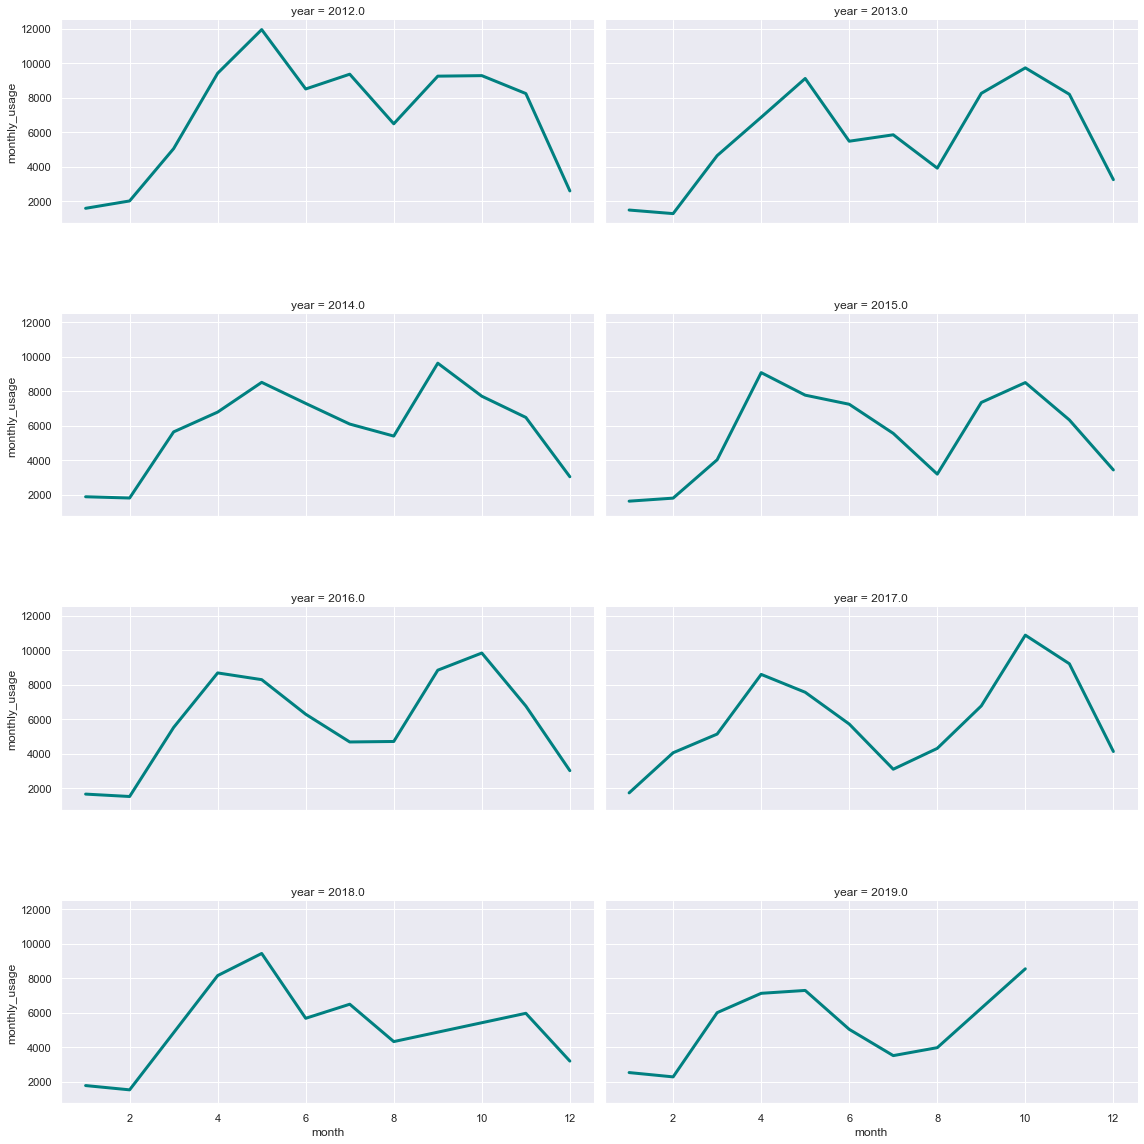

In [51]:
temp_df = outdoorlight_combine_df.groupby(['month', 'year']).monthly_usage.median().reset_index()
ax = sns.FacetGrid(temp_df, col='year', col_wrap=2, height=4, aspect=2,  sharey=True)
ax.map(plt.plot, 'month', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.show()

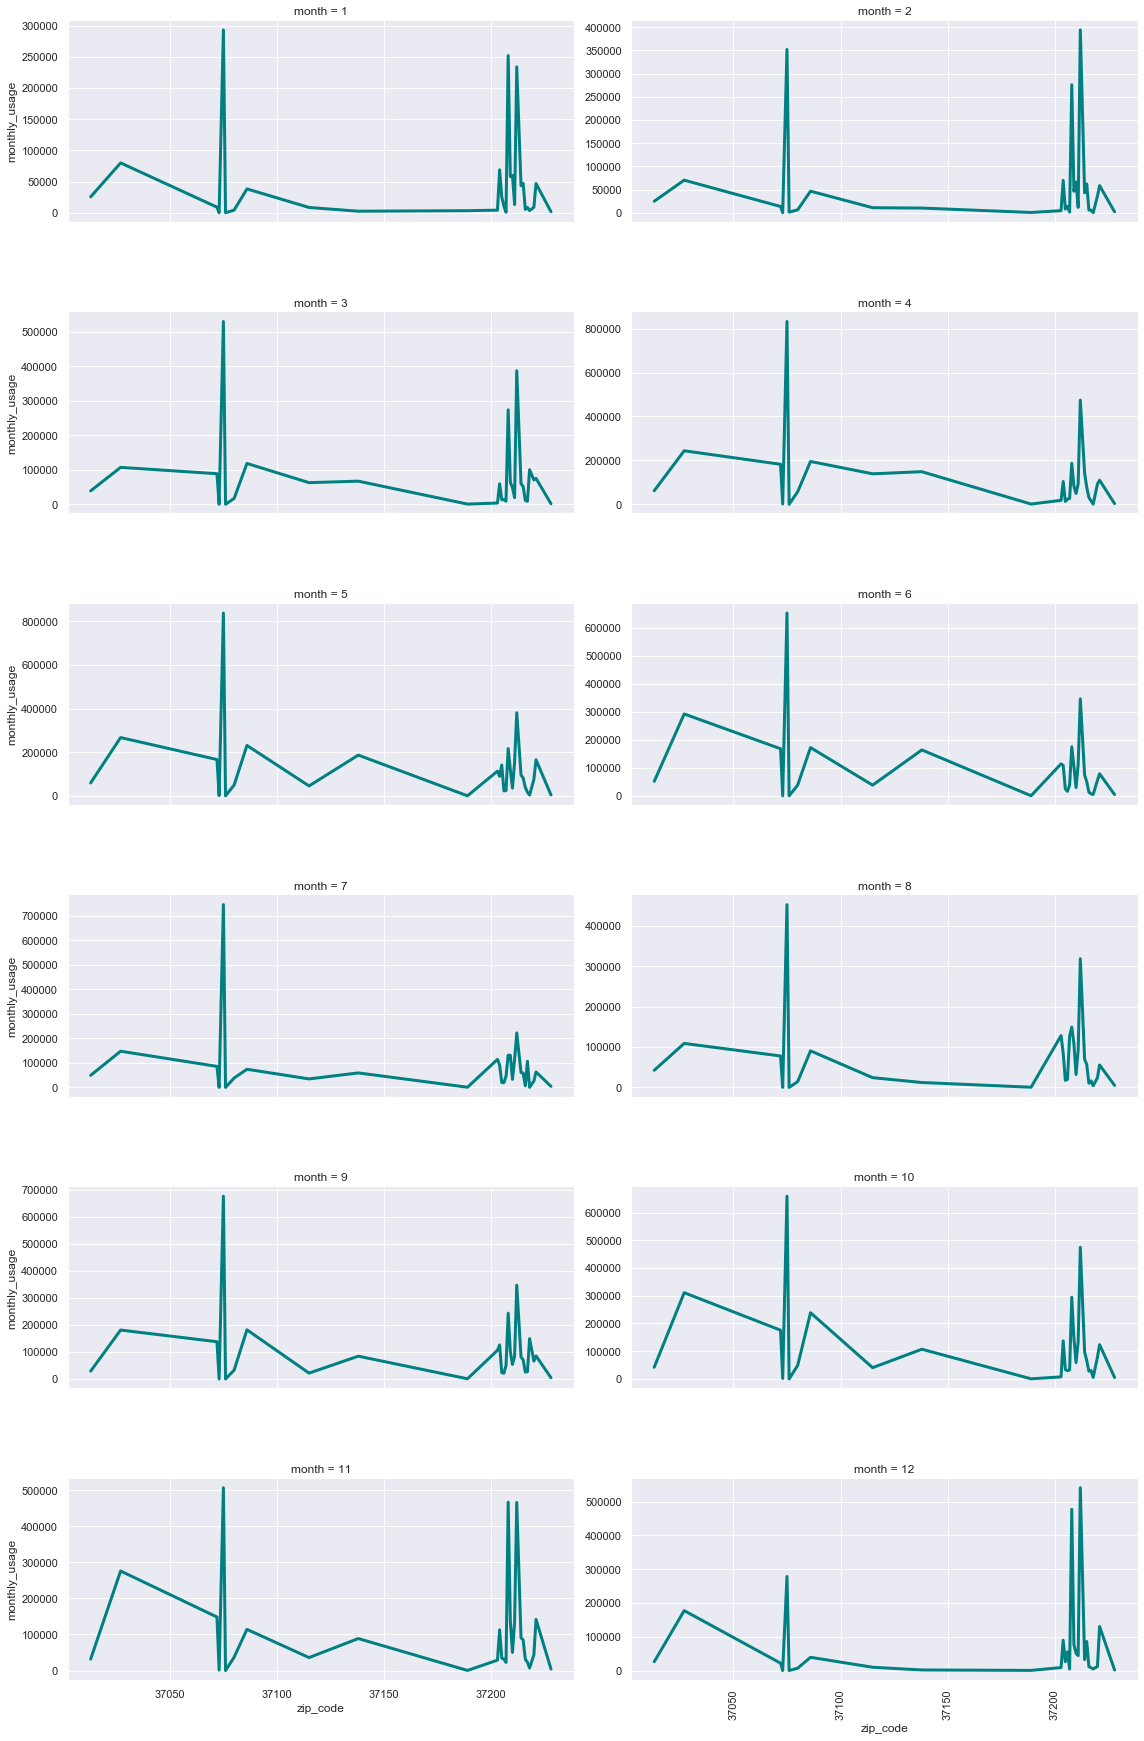

In [57]:
#bold('**MONTHLY USAGE PER ZIP CODE BY THE OUTDOOR LIGHTING CUSTOMER**')
temp_df = outdoorlight_combine_df.groupby(['zip_code', 'month']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col="month", col_wrap=2, height=4, aspect=2,  sharey=False)
ax.map(plt.plot, 'zip_code', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.xticks(rotation=90)
plt.show()

###### Seasonal Customer DataFrame

In [46]:
seasonal_combine_df = energy_consumption_combine_df2.loc[energy_consumption_combine_df2.customer_type == 'seasonal']
seasonal_combine_df.head()

,year,month,zip_code,customer_type,monthly_usage,lat,lng,geometry
8021,2015.0,8,37210.0,seasonal,0.0,36.140869,-86.738847,POINT (-86.73884700000001 36.140869)
8022,2015.0,8,37212.0,seasonal,0.0,36.133256,-86.801456,POINT (-86.801456 36.133256)
8023,2015.0,8,37205.0,seasonal,34400.0,36.112469,-86.867263,POINT (-86.86726299999999 36.112469)
8024,2015.0,8,37072.0,seasonal,1320.0,36.350389,-86.731255,POINT (-86.731255 36.350389)
8025,2015.0,8,37086.0,seasonal,0.0,36.014912,-86.564300,POINT (-86.5643 36.014912)


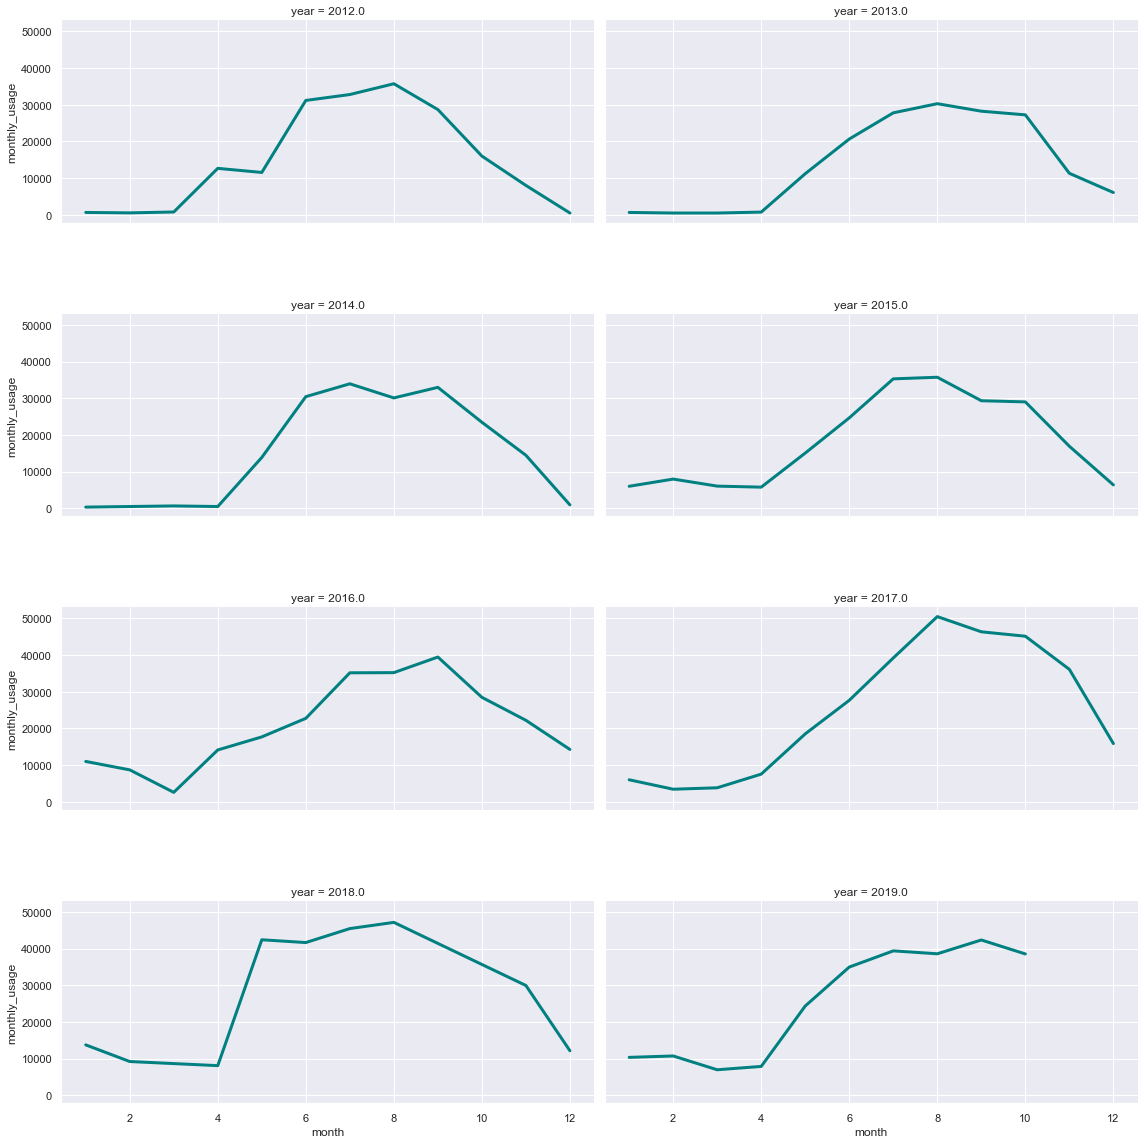

In [53]:
temp_df = seasonal_combine_df.groupby(['month', 'year']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col='year', col_wrap=2, height=4, aspect=2,  sharey=True)
ax.map(plt.plot, 'month', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.show()

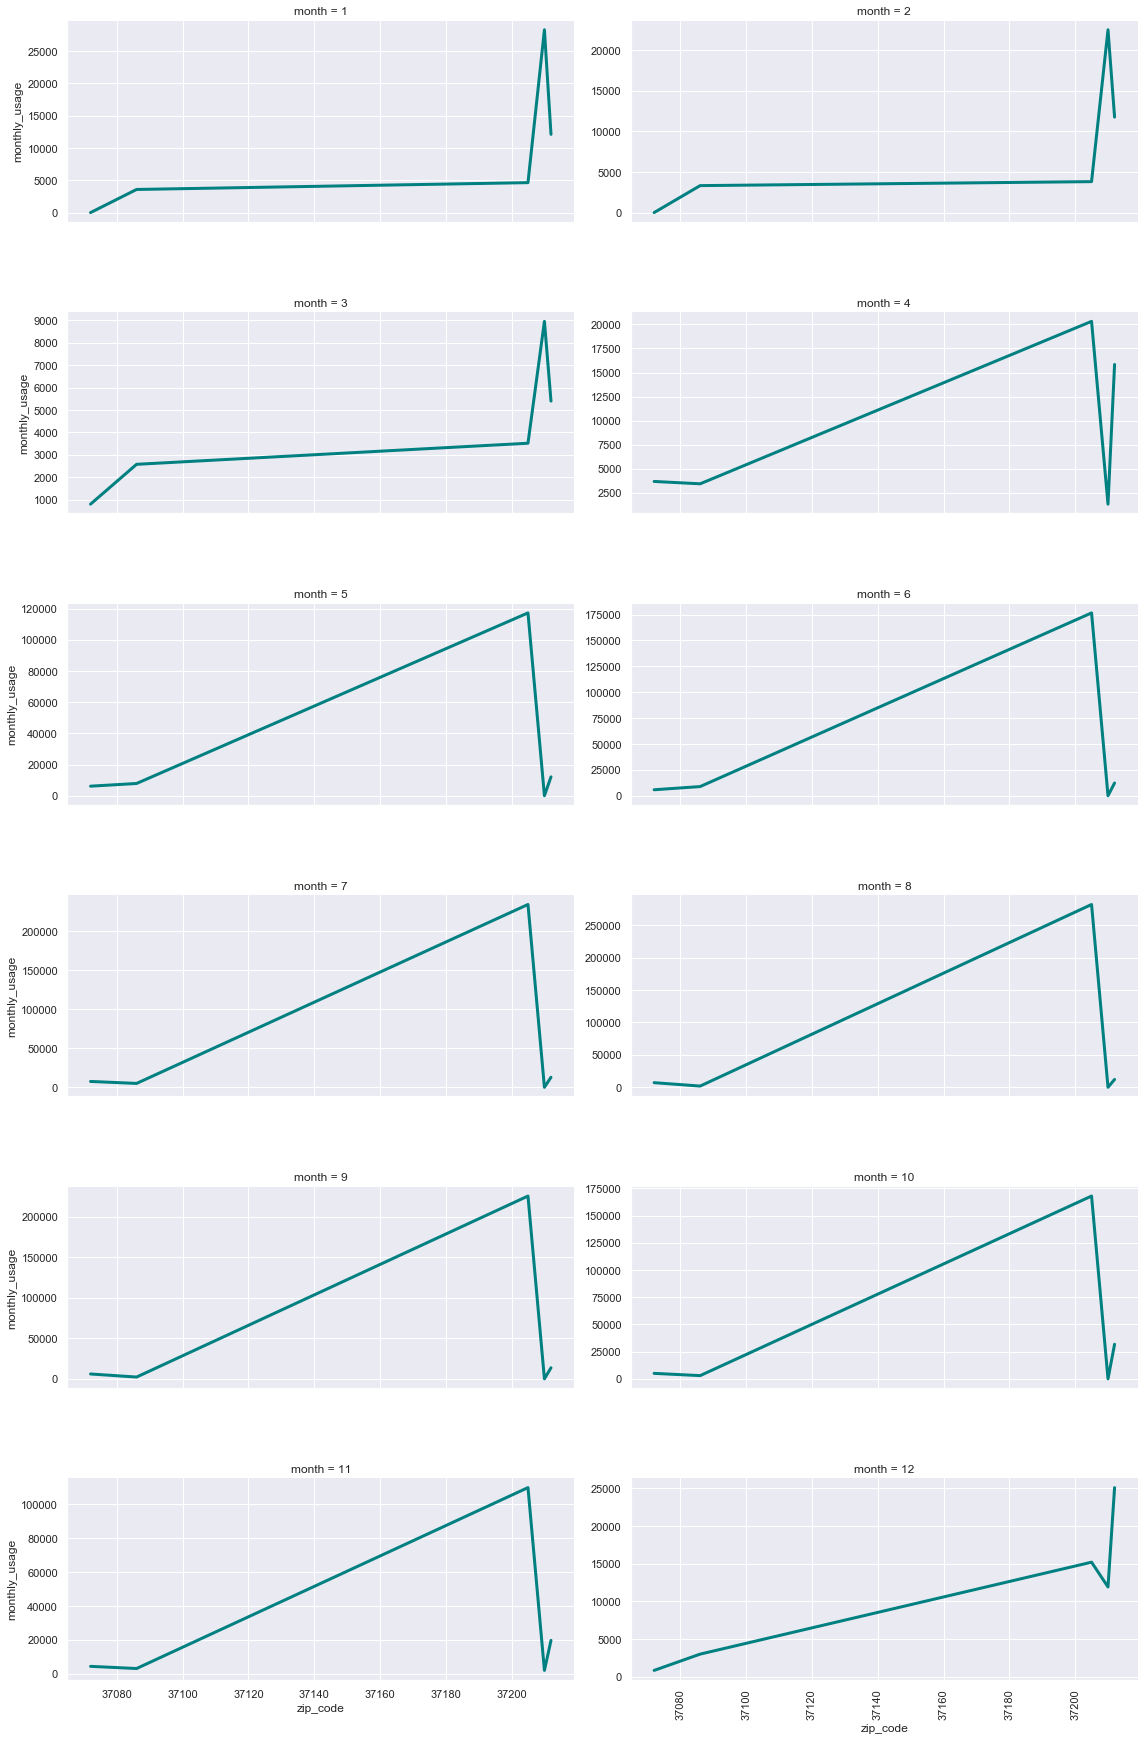

In [56]:
#bold('**MONTHLY USAGE PER ZIP CODE BY THE SEASONAL CUSTOMER**')
temp_df = seasonal_combine_df.groupby(['zip_code', 'month']).monthly_usage.sum().reset_index()
ax = sns.FacetGrid(temp_df, col="month", col_wrap=2, height=4, aspect=2,  sharey=False)
ax.map(plt.plot, 'zip_code', 'monthly_usage', color="teal", linewidth = 3)
plt.subplots_adjust(hspace=0.45)
plt.xticks(rotation=90)
plt.show()

In [60]:
building_permits = pd.read_csv('data/Building_Permits_Issued.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
building_permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2019070460,Building Residential - New,Single Family Residence,058100C04900CO,11/18/2019,12/09/2019,270585.0,1037 LAWSONS RIDGE DR,NASHVILLE,TN,37218,LOT 49 CARRINGTON PLACE PH 5,CELEBRATION HOMES LLC,CARN,CAA01R301,3733056,To construct a single family residence of 2402...,1.0,37010105.0,"1037 LAWSONS RIDGE DR\nNASHVILLE, TN 37218"
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COMMON AREA HOMES AT BRIAR,COLE INVESTMENTS LLC,CAUO,CAA03R301,3611315,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,37010802.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019041868,Building Demolition Permit,Demolition Permit - Residential,09112014600,07/15/2019,07/22/2019,10000.0,4400 DELAWARE AVE,NASHVILLE,TN,37209,LOTS 301 & 303 BLK 38 W NASH PLAN NO 1,BUILD NASHVILLE LLC,CADM,CAZ01A001,3691130,to demolish exiting single family residence. n...,20.0,37013300.0,"4400 DELAWARE AVE\nNASHVILLE, TN 37209\n(36.15..."
3,2019043169,Building Use & Occupancy,"Accessory Structure, Pools - Residential",03900024200,07/22/2019,07/22/2019,5600.0,6341 OLD HICKORY BLVD,WHITES CREEK,TN,37189,LOT 2 DENNY SUB,Janet Denny,CAUO,CAA14U017,3693166,to construct 24' round above ground pool to th...,1.0,37010104.0,"6341 OLD HICKORY BLVD\nWHITES CREEK, TN 37189\..."
4,2017000049,Building Residential - New,Single Family Residence,164100A43100CO,01/03/2017,01/09/2017,268107.0,704 ABERCORN CT,ANTIOCH,TN,37013,LOT 79 SUMMERFIELD SUBDIVISION VILLAGE TEN,"NVR, INC. T/A RYAN HOMES",CARN,CAA01R301,3306701,TO CONSTRUCT A NEW SINGLE FAMILY RES AT 2380 S...,32.0,37015630.0,"704 ABERCORN CT\nANTIOCH, TN 37013\n(36.045042..."


In [ ]:
building_type_permits = building_permits.loc